In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import datetime as dt
import yaml
from pandas.tseries import offsets
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullLocator)
import matplotlib.dates as mdates

In [11]:
df = pd.read_csv('../input/RadarBox20200112-20200411.csv', sep='|', quotechar='"')

In [12]:
df.head()

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Notes,Unnamed: 10,Unnamed: 11
0,11-Apr,WQ3612,"Dallas, TX (DAL/KDAL)",18:35 CDT,"San Antonio, TX (SAT/KSAT)",-,B734 (N458UW),Est. Arrival 19:43 CDT,00h52m,LIVE,NaN,NaN
1,11-Apr,WQ3611,"Harrisburg, PA (MDT/KMDT)",15:05 EDT,"Dallas, TX (DAL/KDAL)",-,B734 (N458UW),Landed 17:30 CDT,03h16m,NaN,NaN,NaN
2,11-Apr,WQ3610,"Buffalo, NY (BUF/KBUF)",13:15 EDT,"Harrisburg, PA (MDT/KMDT)",-,B734 (N458UW),Landed,00h38m,NaN,NaN,NaN
3,11-Apr,WQ3609,"San Antonio, TX (SAT/KSAT)",08:00 CDT,"Buffalo, NY (BUF/KBUF)",-,B734 (N458UW),Landed 11:58 EDT,02h46m,NaN,NaN,NaN
4,10-Apr,WQ3538,"Alexandria, LA (AEX/KAEX)",15:20 CDT,"Brownsville, TX (BRO/KBRO)",-,B733 (N626SW),Landed,01h17m,NaN,NaN,NaN


In [13]:
df['Date'] = [x+'-2020' for x in df['Date']]

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.head()

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Notes,Unnamed: 10,Unnamed: 11
0,2020-04-11,WQ3612,"Dallas, TX (DAL/KDAL)",18:35 CDT,"San Antonio, TX (SAT/KSAT)",-,B734 (N458UW),Est. Arrival 19:43 CDT,00h52m,LIVE,NaN,NaN
1,2020-04-11,WQ3611,"Harrisburg, PA (MDT/KMDT)",15:05 EDT,"Dallas, TX (DAL/KDAL)",-,B734 (N458UW),Landed 17:30 CDT,03h16m,NaN,NaN,NaN
2,2020-04-11,WQ3610,"Buffalo, NY (BUF/KBUF)",13:15 EDT,"Harrisburg, PA (MDT/KMDT)",-,B734 (N458UW),Landed,00h38m,NaN,NaN,NaN
3,2020-04-11,WQ3609,"San Antonio, TX (SAT/KSAT)",08:00 CDT,"Buffalo, NY (BUF/KBUF)",-,B734 (N458UW),Landed 11:58 EDT,02h46m,NaN,NaN,NaN
4,2020-04-10,WQ3538,"Alexandria, LA (AEX/KAEX)",15:20 CDT,"Brownsville, TX (BRO/KBRO)",-,B733 (N626SW),Landed,01h17m,NaN,NaN,NaN


In [25]:
df.set_index('Date').groupby(pd.Grouper(freq='M'))['Flight'].count()

Date
2020-01-31    1330
2020-02-29    2005
2020-03-31    1492
2020-04-30     130
Freq: M, Name: Flight, dtype: int64

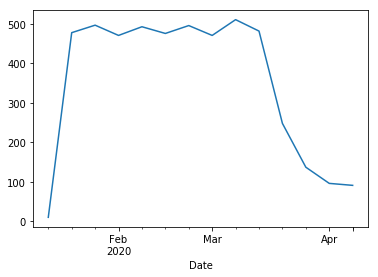

In [33]:
df.set_index('Date').groupby(pd.Grouper(freq='W'))['Flight'].count().plot()

In [36]:
df.groupby('Departure')['Flight'].count().sort_values(ascending=False).head(30)

Departure
Miami, FL (MIA/KMIA)             952
Havana (HAV/MUHA)                356
-                                198
Alexandria, LA (AEX/KAEX)        168
Santo Domingo (SDQ/MDSD)         146
Phoenix, AZ (AZA/KIWA)           140
Brownsville, TX (BRO/KBRO)       137
Santa Clara (SNU/MUSC)           118
Holguin (HOG/MUHG)                82
Wendover, UT (KENV)               76
Camaguey (CMW/MUCM)               74
Guatemala City (GUA/MGGT)         69
Atlantic City, NJ (ACY/KACY)      66
Newark, NJ (EWR/KEWR)             55
El Paso, TX (ELP/KELP)            55
Bullhead City, AZ (IFP/KIFP)      53
Nashville, TN (BNA/KBNA)          52
Greensboro, NC (GSO/KGSO)         51
Raleigh/Durham, NC (RDU/KRDU)     47
La Mesa (SAP/MHLM)                47
Memphis, TN (MEM/KMEM)            45
Santiago (SCU/MUCU)               37
Philadelphia, PA (PHL/KPHL)       37
San Antonio, TX (SAT/KSAT)        36
Syracuse, NY (SYR/KSYR)           36
Dallas, TX (DAL/KDAL)             35
Baton Rouge, LA (BTR/KBTR)  

In [77]:
df.groupby(['Departure', 'Arrival'])['Flight'].count().sort_values(ascending=False).head(25)

Departure                   Arrival                   
Havana (HAV/MUHA)           Miami, FL (MIA/KMIA)          342
Miami, FL (MIA/KMIA)        Havana (HAV/MUHA)             338
Santo Domingo (SDQ/MDSD)    Miami, FL (MIA/KMIA)          139
Miami, FL (MIA/KMIA)        Santo Domingo (SDQ/MDSD)      135
                            Santa Clara (SNU/MUSC)        111
Santa Clara (SNU/MUSC)      Miami, FL (MIA/KMIA)          108
-                           -                              97
Miami, FL (MIA/KMIA)        Holguin (HOG/MUHG)             76
Holguin (HOG/MUHG)          Miami, FL (MIA/KMIA)           76
Camaguey (CMW/MUCM)         Miami, FL (MIA/KMIA)           74
Miami, FL (MIA/KMIA)        Camaguey (CMW/MUCM)            70
Alexandria, LA (AEX/KAEX)   Brownsville, TX (BRO/KBRO)     38
Santiago (SCU/MUCU)         Miami, FL (MIA/KMIA)           37
Miami, FL (MIA/KMIA)        Santiago (SCU/MUCU)            37
Guatemala City (GUA/MGGT)   Phoenix, AZ (AZA/KIWA)         30
San Juan (SJU/T

In [115]:
ice_us = ["Alexandria, LA (AEX/KAEX)",
            "Phoenix, AZ (AZA/KIWA)",
            "Brownsville, TX (BRO/KBRO)",
            "El Paso, TX (ELP/KELP)",
            "San Antonio, TX (SAT/KSAT)",
            "Yakima, WA (YKM/KYKM)"]

In [116]:
df[df['Departure'].isin(ice_us)].set_index('Date').groupby(pd.Grouper(freq='M'))['Flight'].count()

Date
2020-01-31     4
2020-02-29    14
2020-03-31    23
2020-04-30     8
Freq: M, Name: Flight, dtype: int64

In [117]:
df['Aircraft'] = df['Aircraft'].str.replace(u'\xa0', ' ')

In [118]:
len(set(df['Aircraft']))

43

In [119]:
set(df['Aircraft'].head())

{'B733 (N626SW)', 'B734 (N458UW)'}

In [120]:
ice_flights = set(df[df['Departure'].isin(ice_us)]['Aircraft'])

In [121]:
ice_flights = ice_flights.union(set(df[df['Arrival'].isin(ice_us)]['Aircraft']))

In [122]:
df[df['Aircraft'].isin(ice_flights)].set_index('Date').groupby(pd.Grouper(freq='M'))['Aircraft'].count()

Date
2020-01-31    733
2020-02-29    954
2020-03-31    700
2020-04-30     72
Freq: M, Name: Aircraft, dtype: int64

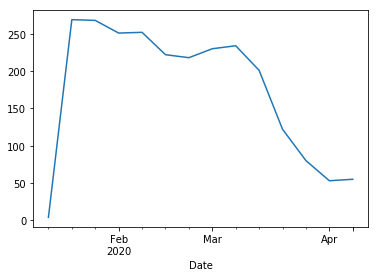

In [123]:
df[df['Aircraft'].isin(ice_flights)].set_index('Date').groupby(pd.Grouper(freq='W'))['Aircraft'].count().plot()